## Code alongs - CNN

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [6]:
# 50000 images, 32x32 for each image with 3 color channels (RGB)
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
# Remove extra dimension
y_train, y_test = y_train.ravel(), y_test.ravel()

In [12]:
y_train.shape

(50000,)

In [15]:
labels = "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"    
labels_dict = {i: labels for i, lbale in enumerate(labels)}
labels_dict

{0: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 1: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 2: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 3: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 4: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 5: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 6: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 7: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 8: ('airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'hors

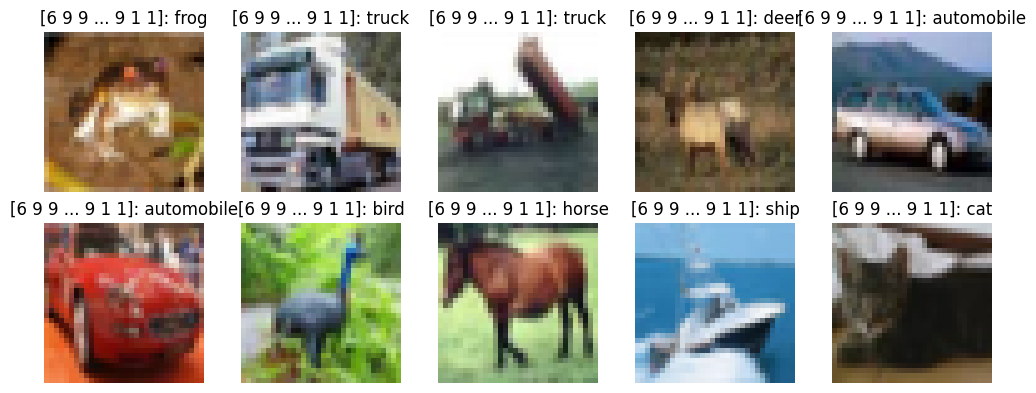

In [19]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train}: {labels[y_train[i]]}")

fig.tight_layout()

In [21]:
x_train[1].shape

(32, 32, 3)

In [22]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [23]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

## CNN Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model (learning_rate = .001, dropout_rate = .5, kernels = [32, 64]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layer
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, # number of kernels in each layer
            kernel_size=(3,3), # also (5,5), (7,7) available
            activation = "relu", # good starting point
            kernel_initializer = "he_normal", # initializing weights, good to use with relu
            input_shape = x_train.shape[1:] # 32x32x3    
        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # note these can also be tuned

    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dense(10, activation = "softmax")) # softmax -> probabilities for each output

    model.compile(loss="sparse_categorical_crossentropy", optimizer = adam, metrics=["acc"])
    
    return model

model = cnn_model(kernels=[32,64,32])
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=1/5)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7767 - loss: 0.6419 - val_acc: 0.7085 - val_loss: 0.8461
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7726 - loss: 0.6389 - val_acc: 0.7018 - val_loss: 0.8697
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7727 - loss: 0.6459 - val_acc: 0.7097 - val_loss: 0.8458
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7756 - loss: 0.6321 - val_acc: 0.6988 - val_loss: 0.8563
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.7724 - loss: 0.6350 - val_acc: 0.6879 - val_loss: 0.8929
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.7775 - loss: 0.6252 - val_acc: 0.7131 - val_loss: 0.8306
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7787 - loss: 0.6182 - val_acc: 0.7161 - val_loss: 0.8257
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.7748 - loss: 0.6248 - val_acc: 0.7116 - val_loss: 0.8376
Epoch 9/100
1250/1250 ━━━━━━━

In [30]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.291325,1.872452,0.4260,1.546385
1,0.428800,1.534093,0.5235,1.329735
2,0.497875,1.375914,0.5737,1.207262
3,0.537200,1.274160,0.5825,1.163958
4,0.560500,1.213446,0.6091,1.133428


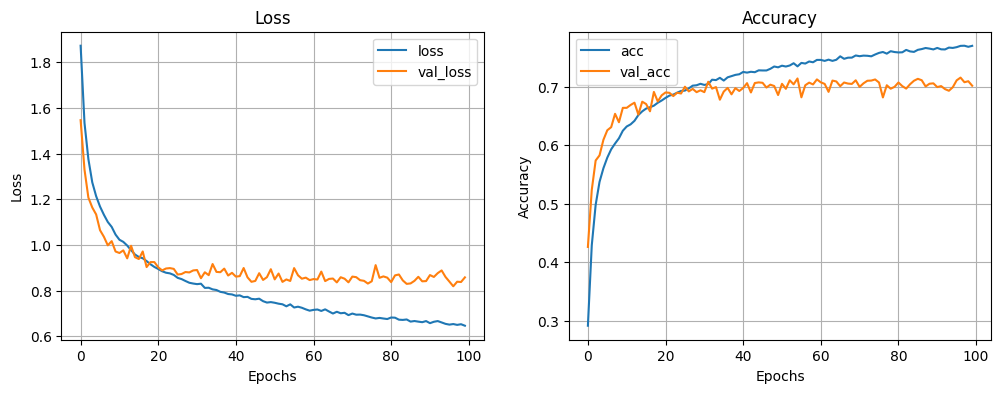

In [36]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel= "Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel= "Epochs", ylabel="Accuracy")

plot_metrics(metrics)

## Hyperparameter tuning

- dropout rate
- learning rate
- different network configurations
- which type of pooling layer
- differen optimizers
- ...

we pick dropout to tune

In [40]:
# short patience for demo
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=3, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = cnn_model(**kwargs)

    # Few epochs for demo
    model.fit(scaled_X_train, y_train, epochs=10, callbacks=[early_stopper], validation_split=1/5)

    metrics = pd.DataFrame(model.history.history)
    # Gets last epochs validation accuracy
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc




In [41]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies [dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

c:\School Code\OPA23\Artificial_Intelligence_Hampus_Erlandsson_OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.4137 - loss: 1.6317 - val_acc: 0.5850 - val_loss: 1.1792
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.6188 - loss: 1.0819 - val_acc: 0.6442 - val_loss: 1.0215
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.6851 - loss: 0.8914 - val_acc: 0.6692 - val_loss: 0.9553
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.7426 - loss: 0.7412 - val_acc: 0.6799 - val_loss: 0.9355
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.7869 - loss: 0.6198 - val_acc: 0.6987 - val_loss: 0.9076
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.8184 - loss: 0.5169 - val_acc: 0.6980 - val_loss: 0.9353
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.8565 - loss: 0.4161 - val_acc: 0.6955 - val_loss: 0.9672
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.8852 - loss: 0.3348 - val_acc: 0.7002 - val_loss: 1.0649
Epoch 1/10
1250/1250 ━━━

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

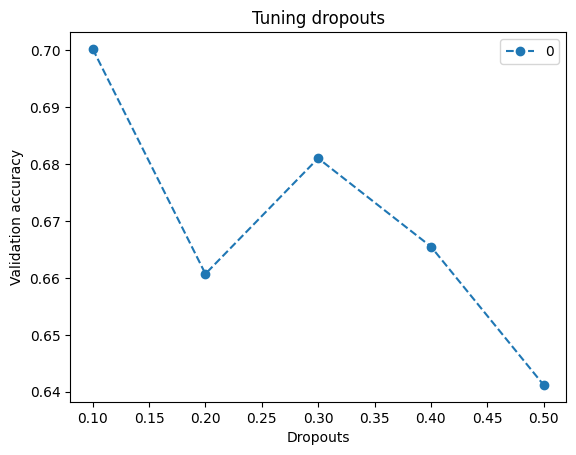

In [42]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)